<a href="https://colab.research.google.com/github/ParkkaviSivakaran72/Dog-Vs-Cat-classification/blob/main/Dog_vs_Cat_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#installing the kaggle library
!pip install kaggle

In [3]:
#configuring the path kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing the dog vs cat dataset from kaggle


In [4]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:06<00:00, 237MB/s]
100% 812M/812M [00:06<00:00, 128MB/s]


In [5]:
!kaggle datasets list


ref                                                            title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
khushikyad001/mental-health-and-burnout-in-the-workplace       Mental Health & Burnout in the Workplace           109284  2025-07-04 13:15:36.800000            790         22  1.0              
urvishahir/electric-vehicle-specifications-dataset-2025        Electric Vehicle Specs Dataset (2025)               16631  2025-06-20 07:14:56.777000           4486        109  1.0              
divyaraj2006/social-media-engagement                           social media engagement                              2142  2025-07-02 15:34:21.323000           1728         37  1.0              
adilshamim8/salaries-for-data-

In [6]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall();
  print('Successfully extracting the dataset zip file')

Successfully extracting the dataset zip file


In [7]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall();
  print('Successfully extracting the test data zip file')

Successfully extracting the test data zip file


In [8]:
#extracting the zip file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall();
  print('Successfully extracting the training dataset zip file')

Successfully extracting the training dataset zip file


In [9]:
import os

#counting the files
paths,dirs,files = next(os.walk("/content/train"))

files_count = len(files)
print('images count : ',files_count)

images count :  25000


In [10]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.4088.jpg', 'dog.4487.jpg', 'cat.12235.jpg', 'dog.4384.jpg', 'cat.11901.jpg', 'cat.953.jpg', 'dog.383.jpg', 'dog.8121.jpg', 'cat.3737.jpg', 'cat.10688.jpg', 'cat.6289.jpg', 'dog.938.jpg', 'cat.6918.jpg', 'dog.7989.jpg', 'cat.11586.jpg', 'cat.6147.jpg', 'cat.10505.jpg', 'cat.11116.jpg', 'cat.9951.jpg', 'dog.4256.jpg', 'cat.8061.jpg', 'cat.2688.jpg', 'cat.9644.jpg', 'dog.5351.jpg', 'dog.1488.jpg', 'dog.7152.jpg', 'cat.8827.jpg', 'dog.5863.jpg', 'cat.6021.jpg', 'cat.6934.jpg', 'cat.1956.jpg', 'cat.4149.jpg', 'dog.2181.jpg', 'dog.1390.jpg', 'cat.3531.jpg', 'dog.8527.jpg', 'cat.16.jpg', 'dog.4534.jpg', 'dog.5687.jpg', 'dog.5766.jpg', 'dog.4763.jpg', 'cat.4051.jpg', 'cat.6189.jpg', 'dog.589.jpg', 'cat.9210.jpg', 'dog.7851.jpg', 'dog.5379.jpg', 'dog.8463.jpg', 'cat.7000.jpg', 'dog.397.jpg', 'dog.1131.jpg', 'cat.6325.jpg', 'dog.9992.jpg', 'dog.2148.jpg', 'dog.8095.jpg', 'cat.9294.jpg', 'dog.4228.jpg', 'cat.3607.jpg', 'dog.6494.jpg', 'dog.11729.jpg', 'dog.5479.jpg', 'dog.6485.jpg', 'dog.88

importing the dependenices

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

display the images and cats

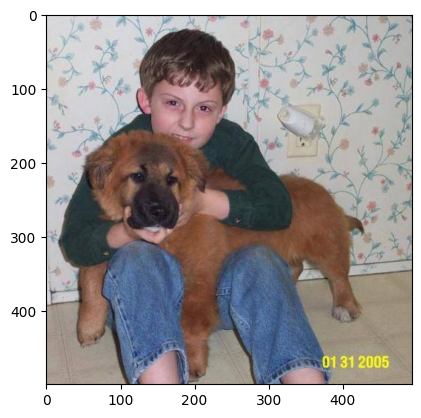

In [12]:
#display the dog image
img = mpimg.imread('/content/train/dog.4487.jpg')

img_plt = plt.imshow(img)

plt.show()

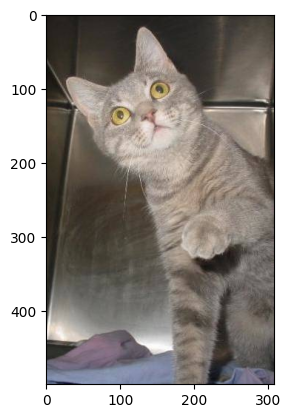

In [13]:
#display the cat image
img = mpimg.imread('/content/train/cat.4088.jpg')

img_plt = plt.imshow(img)

plt.show()

In [14]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for image in file_names:
  name = image[0:3]
  if(name == 'dog'):
    dog_count += 1
  else:
    cat_count += 1

print('Dog counts : ',dog_count)
print('Cat counts : ',cat_count)

Dog counts :  12500
Cat counts :  12500


Resizing the images


In [15]:
os.mkdir('/content/image-resized')

In [17]:
original_folder = '/content/train/'
resized_folder = '/content/image-resized/'

for i in range(2000):
  file_name = os.listdir(original_folder)[i]
  image_path = original_folder+file_name

  img = Image.open(image_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_path = resized_folder + file_name
  img.save(new_path)

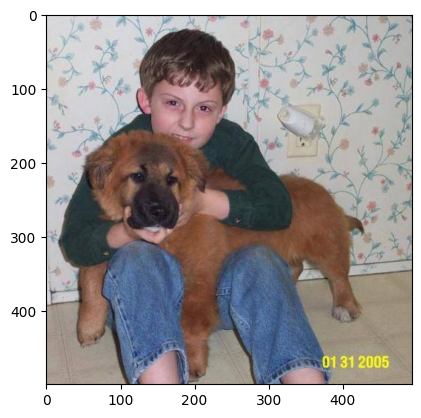

In [19]:
#display the resized dog image
img = mpimg.imread('/content/train/dog.4487.jpg')

img_plt = plt.imshow(img)

plt.show()

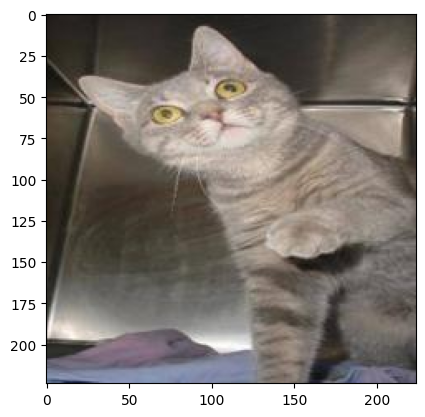

In [18]:
#display the resized cat image
img = mpimg.imread('/content/image-resized/cat.4088.jpg')

img_plt = plt.imshow(img)

plt.show()

Creating labels for rezised images of dogs and cats

In [ ]:
#dog = 0
#cat = 1

In [20]:
labels = []
file_names = os.listdir('/content/image-resized')

for i in range(2000):
  file_name  = file_names[i]
  label = file_name[0:3]

  if(label == 'dog') :
    labels.append(0)
  else:
    labels.append(1)
print(labels)


[1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 

In [21]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)

print(values)
print(counts)

[0 1]
[ 987 1013]


Converting the all resized images to numpy arrays

In [22]:
import cv2
import glob

In [25]:
file_directory = '/content/image-resized/'
file_extension = ['png','jpg']

files = []

[files.extend(glob.glob(file_directory + '*.' + e)) for e in file_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [26]:
print(dog_cat_images)

[[[[ 23  26  31]
   [ 23  26  31]
   [ 24  27  32]
   ...
   [ 48  54  59]
   [ 46  52  57]
   [ 44  50  55]]

  [[ 23  26  31]
   [ 23  26  31]
   [ 24  27  32]
   ...
   [ 51  57  62]
   [ 49  55  60]
   [ 47  53  58]]

  [[ 24  27  32]
   [ 24  27  32]
   [ 25  28  33]
   ...
   [ 54  60  65]
   [ 52  58  63]
   [ 50  56  61]]

  ...

  [[159 130 115]
   [156 127 112]
   [153 124 109]
   ...
   [127 108 111]
   [124 105 108]
   [119 100 103]]

  [[141 111  94]
   [135 105  88]
   [127  97  80]
   ...
   [121 100 103]
   [120  99 102]
   [117  96  99]]

  [[161 131 114]
   [154 124 107]
   [145 115  98]
   ...
   [115  94  97]
   [116  95  98]
   [114  93  96]]]


 [[[216 217 215]
   [216 217 215]
   [216 216 216]
   ...
   [169 178 181]
   [152 162 162]
   [126 136 136]]

  [[216 217 215]
   [216 217 215]
   [216 216 216]
   ...
   [172 182 182]
   [156 166 166]
   [134 145 143]]

  [[216 217 215]
   [216 217 215]
   [216 216 216]
   ...
   [169 177 176]
   [165 173 172]
   [163 172

In [27]:
type(dog_cat_images)

numpy.ndarray

In [28]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [29]:
X = dog_cat_images
Y = np.asarray(labels)

Training the model

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)